<a href="https://colab.research.google.com/github/jadhav-rakesh/Time_Series_Forecasting/blob/main/radom_walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The random walk process
* A random walk is a process in which there is an equal chance of going up or down by a random number
* A random walk is a series whose first difference is stationary and uncorrelated.

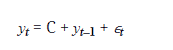

    * y(t) is the value at the present time t
    * C is a constant
    * y(t–1) is the value at the previous timestep t–1
    * ϵ(t) is a random number (white noise) (realization of the standard normal distribution, which has a variance of 1 and a mean of 0)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

steps = np.random.standard_normal(1000)
steps[0] = 0

random_walk = np.cumsum(steps)

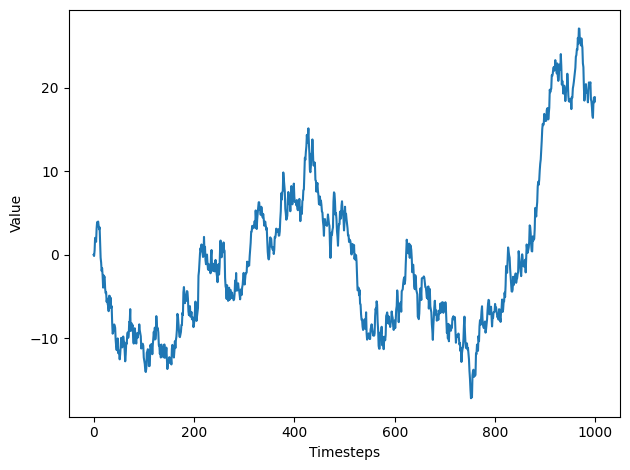

In [2]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")

plt.tight_layout()
plt.savefig("ts1.png")

# Stationarity
- A stationary time series is one whose statistical properties do not change over time.
-  constant mean, variance, and autocorrelation, and these properties are independent of time.


#Transformation
* mathematical operation applied to a time series in order to make it stationary.

##Differencing
*  transformation that calculates the change from one timestep to another.

* subtract the value of the previous timestep y(t-1) from the value in the present y(t) to obtain the differenced value y'(t).

    y'(t) = y(t) - y(t-1

* Taking the difference once is applying a first-order differencing.
* Taking it a second time would be a second-order differencing

*  undoing a transformation is inverse transform

#Testing for stationarity
*  augmented Dickey-Fuller (ADF) test  helps us determine if a time series is stationary by testing for the presence of a unit root. If a unit root is present, the time series is not stationary.


In [3]:
def simulate_process(is_stationary: bool) -> np.array:
    np.random.seed(42)
    process = np.empty(400)

    if is_stationary:
        alpha = 0.5
        process[0] = 0
    else:
        alpha = 1
        process[0] = 10

    for i in range(400):
        if i+1 < 400:
            process[i+1] = alpha*process[i] + np.random.standard_normal()
        else:
            break
    return process

In [4]:
stationary = simulate_process(True)
non_stationary = simulate_process(False)

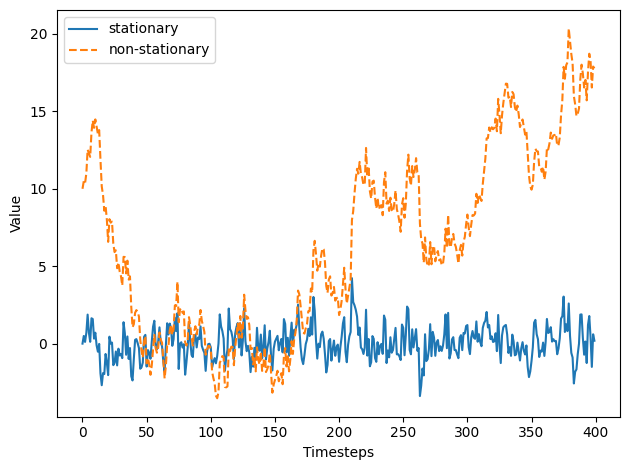

In [5]:
fig, ax = plt.subplots()

ax.plot(stationary, linestyle="-", label="stationary")
ax.plot(non_stationary, linestyle="--", label="non-stationary")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")
ax.legend(loc="best")

plt.tight_layout()
plt.savefig("ts2.png")

In [6]:
def mean_over_time(process: np.array) -> np.array:
    mean_func = []

    for i in range(len(process)):
        mean_func.append(np.mean(process[:i]))

    return mean_func

In [7]:
stationary_mean = mean_over_time(stationary)
non_stationary_mean = mean_over_time(non_stationary)

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


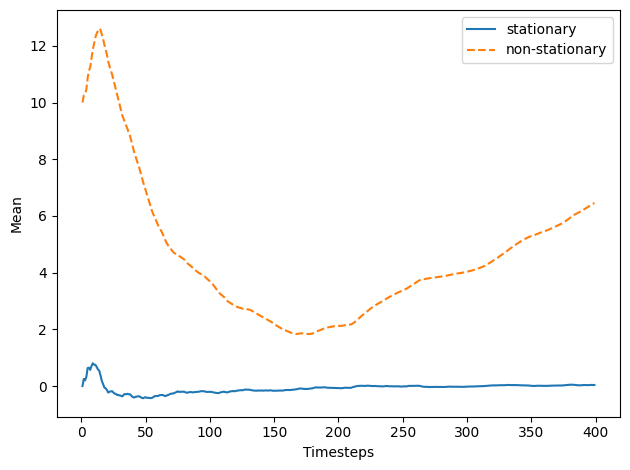

In [8]:
fig, ax = plt.subplots()

ax.plot(stationary_mean, label="stationary")
ax.plot(non_stationary_mean, linestyle="--", label="non-stationary")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Mean")
ax.legend(loc="best")

plt.tight_layout()
plt.savefig("ts3.png")

In [9]:
def var_over_time(process: np.array) -> np.array:
    var_func = []

    for i in range(len(process)):
        var_func.append(np.var(process[:i]))

    return var_func

In [10]:
stationary_var = var_over_time(stationary)
non_stationary_var = var_over_time(non_stationary)

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


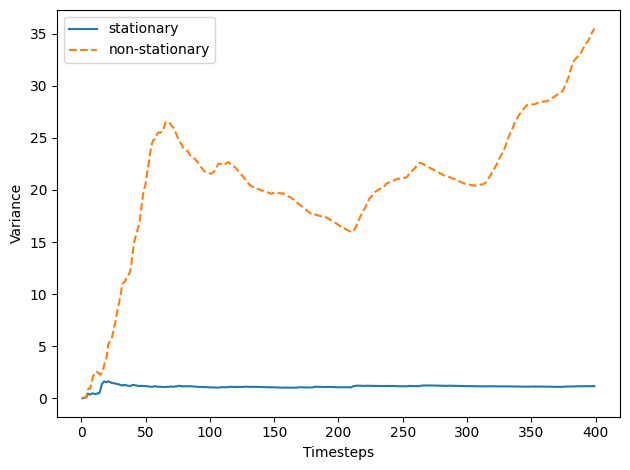

In [11]:
fig, ax = plt.subplots()

ax.plot(stationary_var, label="stationary")
ax.plot(non_stationary_var, linestyle="--", label="non-stationary")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Variance")
ax.legend(loc="best")

plt.tight_layout()
plt.savefig("ts4.png")

#The autocorrelation function
* Correlation measures the extent of a linear relationship between two variables
* Autocorrelation measures the linear relationship between lagged values of a time series.
* lag is simply the number of timesteps separating two values.

* In the presence of a trend, a plot of the ACF will show that the coefficients are high for short lags, and they will decrease linearly as the lag increases.
* If the data is seasonal, the ACF plot will also display cyclical patterns.

In [12]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(random_walk)

print(f"ADF Statstic: {ADF_result[0]}")
print(f"p-value: {ADF_result[1]}")

ADF Statstic: -0.965952487691875
p-value: 0.7654789696692581


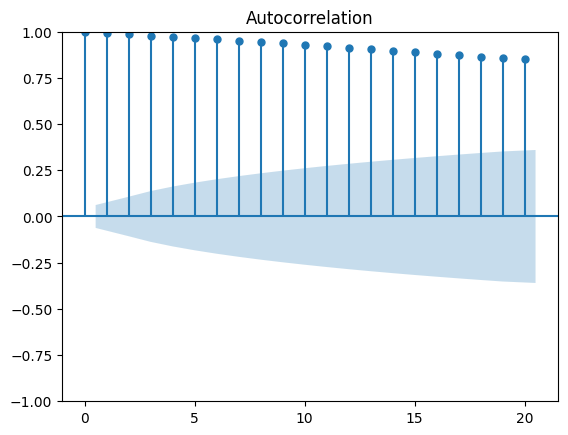

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(random_walk, lags=20)

plt.savefig("ts5.png")

In [14]:
diff_random_walk = np.diff(random_walk, n=1)

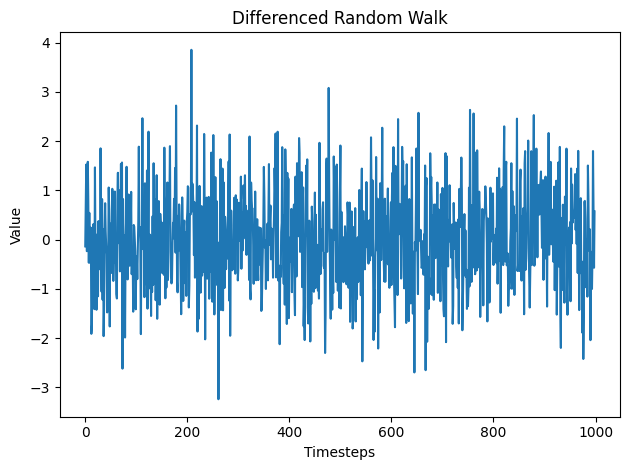

In [15]:
plt.plot(diff_random_walk)
plt.title("Differenced Random Walk")
plt.xlabel("Timesteps")
plt.ylabel("Value")
plt.tight_layout()

plt.savefig("ts6.png")

In [16]:
ADF_result = adfuller(diff_random_walk)

print(f"ADF Statistic: {ADF_result[0]}")
print(f"p-value: {ADF_result[1]}")

ADF Statistic: -31.789310857560594
p-value: 0.0


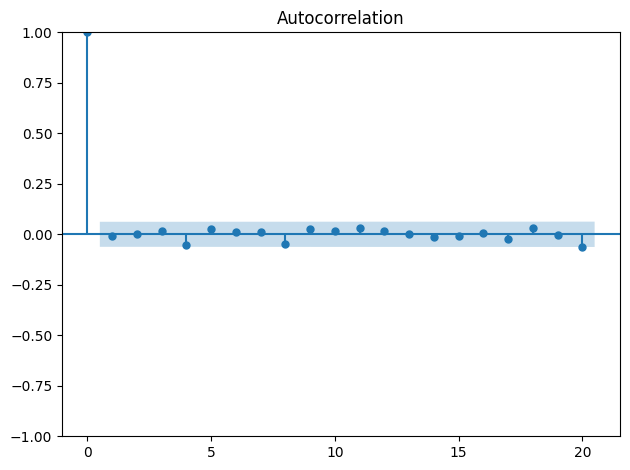

In [17]:
plot_acf(diff_random_walk, lags=20)

plt.tight_layout()

plt.savefig("ts7.png")

In [18]:
df = pd.read_csv("GOOGL.csv")

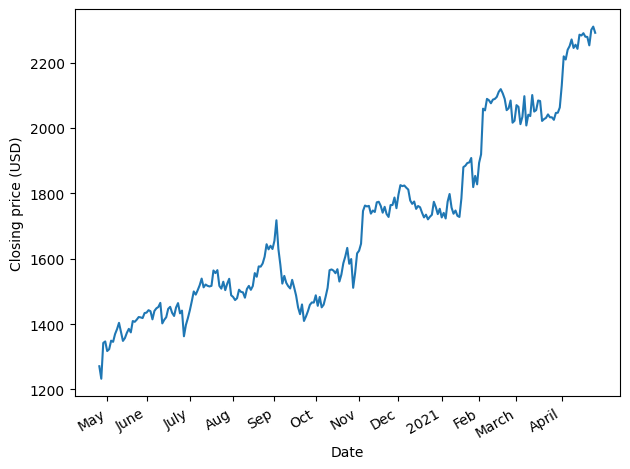

In [19]:
fig, ax = plt.subplots()
ax.plot(df["Date"], df["Close"])
ax.set_xlabel("Date")
ax.set_ylabel("Closing price (USD)")

plt.xticks([4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235],
           ["May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec", 2021, "Feb", "March", "April"])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig("ts8.png")

In [20]:
GOOGL_adf_result = adfuller(df["Close"])

print(f"ADF Stastistic: {GOOGL_adf_result[0]}")
print(f"p-value: {GOOGL_adf_result[1]}")

ADF Stastistic: 0.16025048664771302
p-value: 0.9699419435913057


In [21]:
diff_close = np.diff(df["Close"], n=1)

In [22]:
GOOGL_diff_ADF_result = adfuller(diff_close)

print(f"ADF Stastic: {GOOGL_diff_ADF_result[0]}")
print(f"p-value: {GOOGL_diff_ADF_result[1]}")


ADF Stastic: -5.303439704295234
p-value: 5.3865309614545585e-06


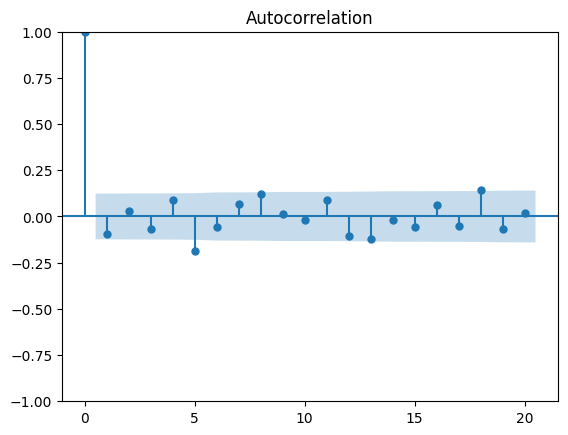

In [23]:
plot_acf(diff_close, lags=20)

plt.savefig("ts9.png")

In [24]:
import pandas as pd

df = pd.DataFrame({"value": random_walk})

train = df[:800]
test = df[800:]

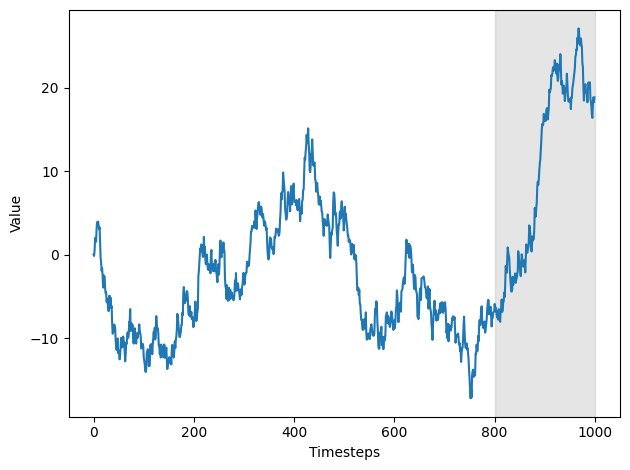

In [25]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")
ax.axvspan(800, 1000, color="grey", alpha=0.2)

plt.tight_layout()
plt.savefig("ts10.png")

In [26]:
mean = np.mean(train.value)

test.loc[:, "pred_mean"] = mean

test.head()

<ipython-input-26-7ac05fc9a14d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "pred_mean"] = mean


,value,pred_mean
800,-5.876664,-3.677206
801,-6.392708,-3.677206
802,-6.296588,-3.677206
803,-6.758863,-3.677206
804,-7.193359,-3.677206


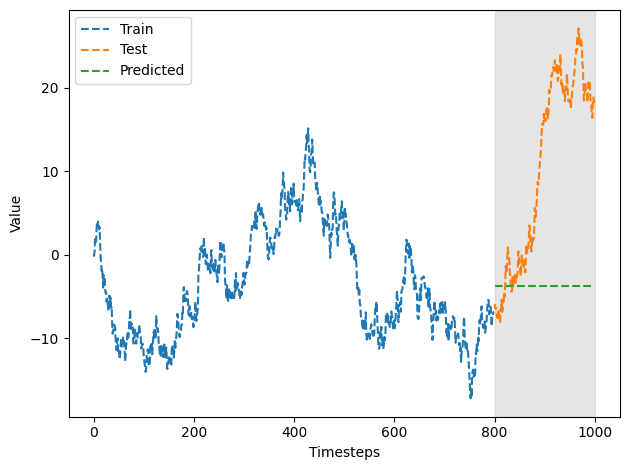

In [27]:
fig, ax = plt.subplots()

ax.plot(train, label="Train", linestyle="--")
ax.plot(test["value"], label="Test", linestyle="--")
ax.plot(test["pred_mean"], linestyle="--", label="Predicted")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")
ax.axvspan(800, 1000, color="grey", alpha=0.2)

ax.legend(loc="best")

plt.tight_layout()
plt.savefig("ts11.png")

In [28]:
last_value = train.iloc[-1].value

test.loc[:, "pred_last"] = last_value

test.head()

<ipython-input-28-b2fe64f5e18e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "pred_last"] = last_value


,value,pred_mean,pred_last
800,-5.876664,-3.677206,-6.814947
801,-6.392708,-3.677206,-6.814947
802,-6.296588,-3.677206,-6.814947
803,-6.758863,-3.677206,-6.814947
804,-7.193359,-3.677206,-6.814947


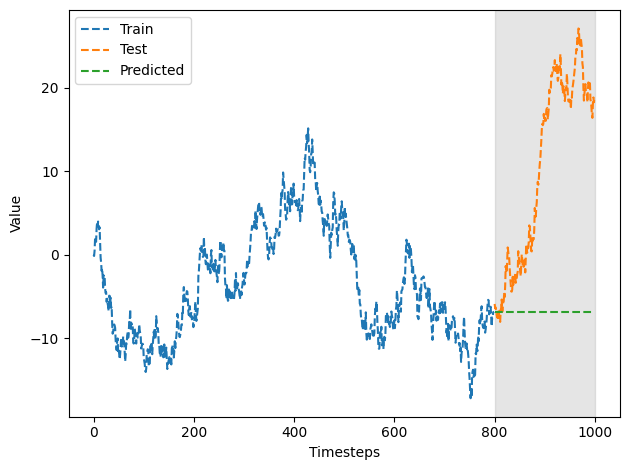

In [29]:
fig, ax = plt.subplots()

ax.plot(train, label="Train", linestyle="--")
ax.plot(test["value"], label="Test", linestyle="--")
ax.plot(test["pred_last"], linestyle="--", label="Predicted")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")
ax.axvspan(800, 1000, color="grey", alpha=0.2)

ax.legend(loc="best")

plt.tight_layout()
plt.savefig("ts12.png")

#The Drift Method
* forecast = drift * timestep

In [30]:
deltaX = 800 - 1
deltaY = last_value - 0

drift = deltaY / deltaX

print(drift)

-0.008529346056640632


In [33]:
x_val = np.arange(800, 1000, 1)
pred_drift = drift * x_val
test.loc[:, "pred_drift"] = pred_drift
test.head()

<ipython-input-33-c23830264d4f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "pred_drift"] = pred_drift


,value,pred_mean,pred_last,pred_drift
800,-5.876664,-3.677206,-6.814947,-6.823477
801,-6.392708,-3.677206,-6.814947,-6.832006
802,-6.296588,-3.677206,-6.814947,-6.840536
803,-6.758863,-3.677206,-6.814947,-6.849065
804,-7.193359,-3.677206,-6.814947,-6.857594


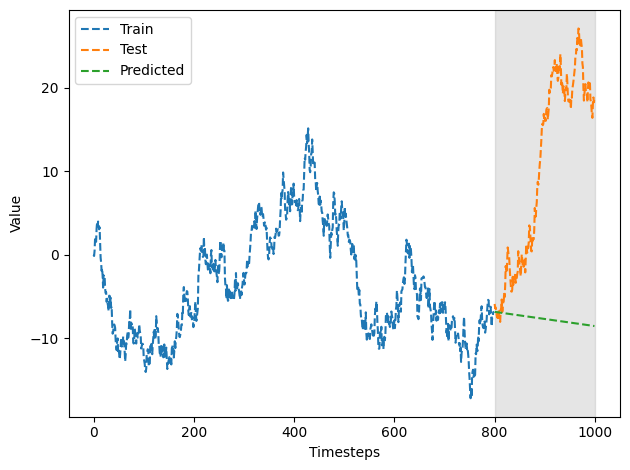

In [34]:
fig, ax = plt.subplots()

ax.plot(train, label="Train", linestyle="--")
ax.plot(test["value"], label="Test", linestyle="--")
ax.plot(test["pred_drift"], linestyle="--", label="Predicted")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")
ax.axvspan(800, 1000, color="grey", alpha=0.2)

ax.legend(loc="best")

plt.tight_layout()
plt.savefig("ts13.png")

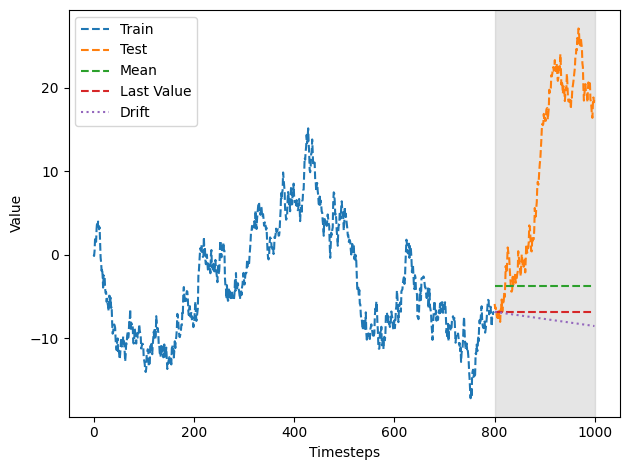

In [36]:
fig, ax = plt.subplots()

ax.plot(train, label="Train", linestyle="--")
ax.plot(test["value"], label="Test", linestyle="--")
ax.plot(test["pred_mean"], linestyle="--", label="Mean")
ax.plot(test["pred_last"], linestyle="--", label="Last Value")
ax.plot(test["pred_drift"], linestyle=":", label="Drift")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")
ax.axvspan(800, 1000, color="grey", alpha=0.2)

ax.legend(loc="best")

plt.tight_layout()
plt.savefig("ts14.png")

In [37]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test["value"], test["pred_mean"])
mse_last = mean_squared_error(test["value"], test["pred_last"])
mse_drift = mean_squared_error(test["value"], test["pred_drift"])

print(mse_mean, mse_last, mse_drift)

326.50277395297474 425.1726033055617 465.9076036601397


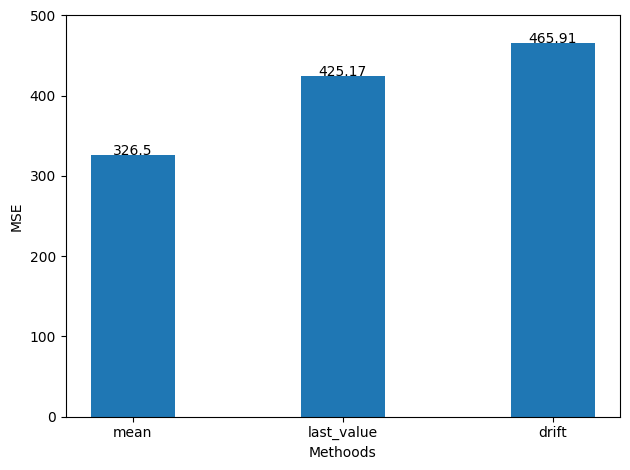

In [38]:
fig, ax = plt.subplots()

x = ["mean", "last_value", "drift"]
y = [mse_mean, mse_last, mse_drift]

ax.bar(x, y, width=0.4)
ax.set_xlabel("Methoods")
ax.set_ylabel("MSE")
ax.set_ylim(0, 500)

for index, value in enumerate(y):
    plt.text(x=index, y=value, s=str(round(value, 2)), ha="center")

plt.tight_layout()

plt.savefig("ts15.png")

# Forecasting the next timestep
* the observed value at a point in time will be used as a forecast for the next point in time.

In [41]:
df_shift = df.shift(periods=1)
df_shift.head()

,value
0,NaN
1,0.000000
2,-0.138264
3,0.509424
4,2.032454


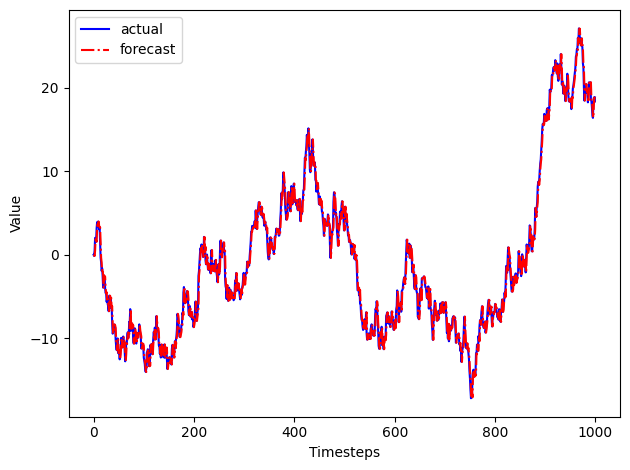

In [45]:
fig, ax = plt.subplots()

ax.plot(df, "b-", label="actual")
ax.plot(df_shift, "r-.", label="forecast")

ax.legend(loc="best")

ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")


plt.tight_layout()
plt.savefig("ts16.png")

In [46]:
mse_one_step = mean_squared_error(test["value"], df_shift[800:])
mse_one_step

0.9256876651440581